In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import random
from pandas import DataFrame
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score

# input file path
datasetdir = "D://indivdual_models//Dataset//2022_EC11K_single_drug"
resultdir = "D://indivdual_models//Result//Model_generation//2022_EC11K_single_drug"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

Starttime: 20221007
AEW541_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2022-10-07 15:19:06.446961
EndTime : 2022-10-07 15:19:10.040051
AEW541’s final rmse value is = 0.860863
AEW541 R-squared value is = -0.167414
Nilotinib_//n
train_X shape: (326, 18988)
326 train samples
81 test samples
StartTime : 2022-10-07 15:19:11.183258
EndTime : 2022-10-07 15:19:13.516319
Nilotinib’s final rmse value is = 0.552904
Nilotinib R-squared value is = -0.015446
17-AAG_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2022-10-07 15:19:14.321654
EndTime : 2022-10-07 15:19:17.967753
17-AAG’s final rmse value is = 1.373748
17-AAG R-squared value is = -0.025069
PHA-665752_//n
train_X shape: (392, 18988)
392 train samples
98 test samples
StartTime : 2022-10-07 15:19:19.098853
EndTime : 2022-10-07 15:19:21.139115
PHA-665752’s final rmse value is = 0.845235
PHA-665752 R-squared value is = -0.014583
Lapatinib_//n
train_X shape: (393, 18988)
393 train

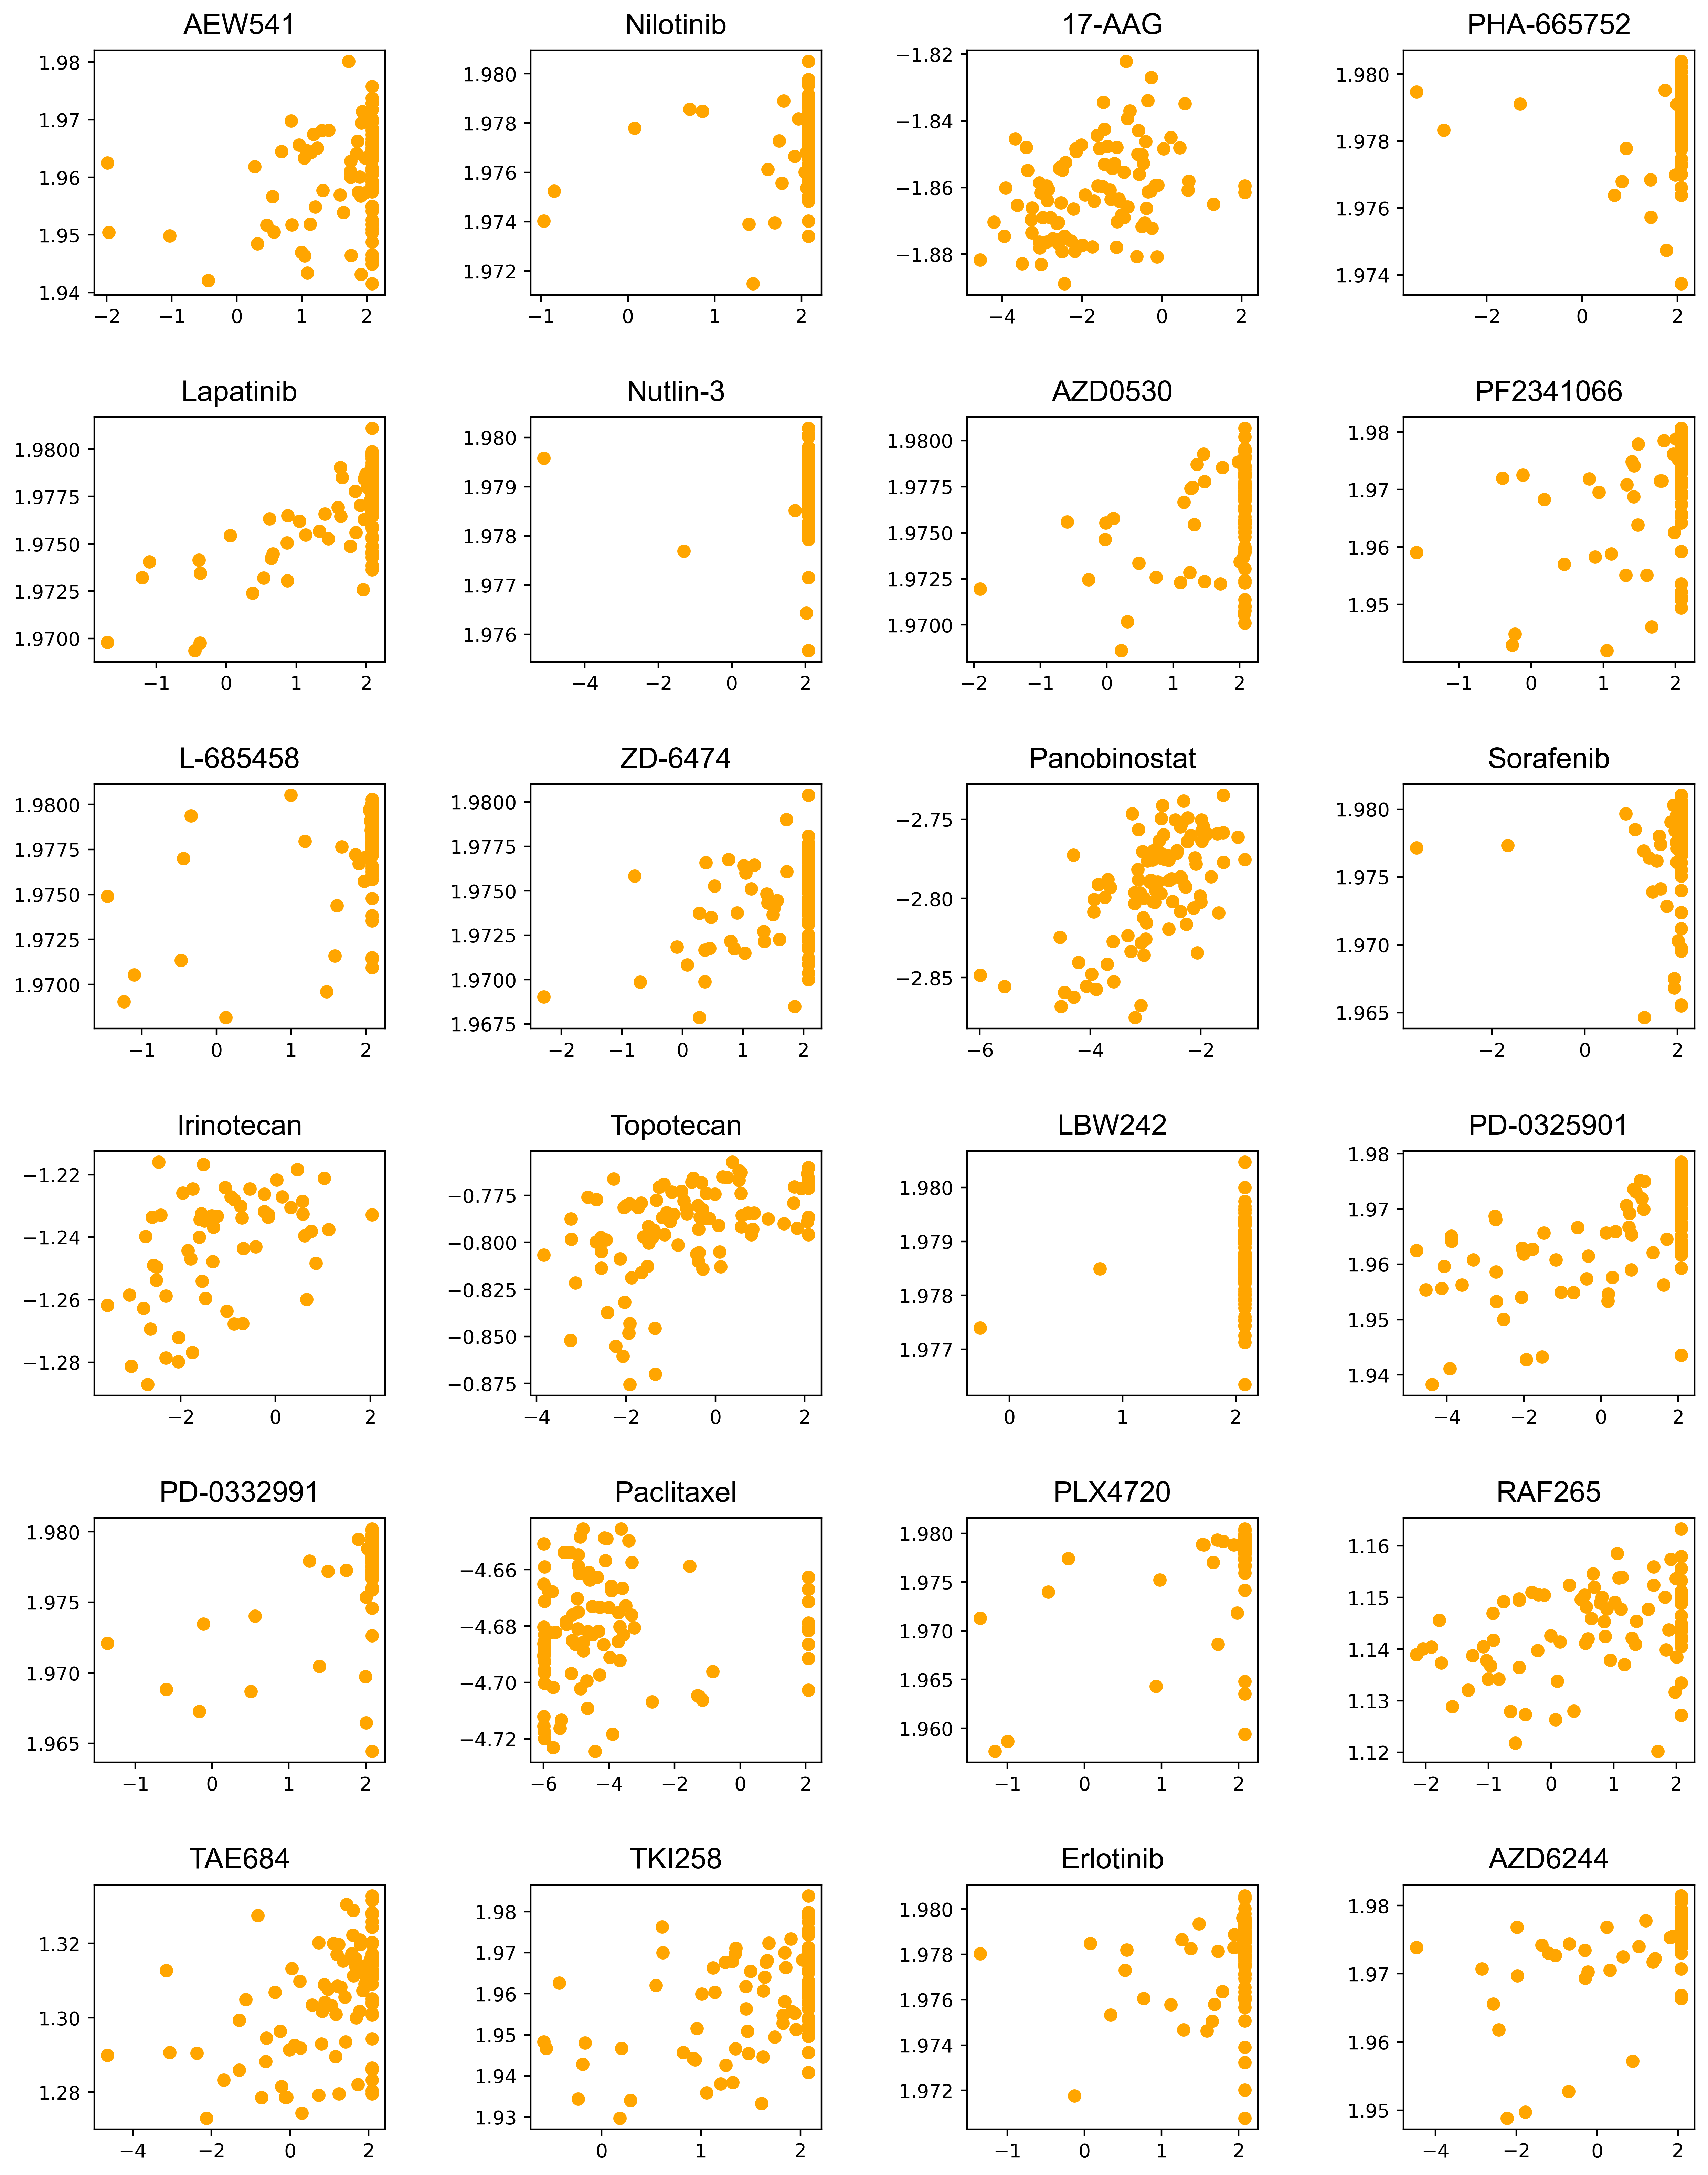

In [3]:
from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "//EC11K_%s.npz" % dname)
    ss0 = np.load(datasetdir + '//EC11K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # z-normalization
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]
    
    from sklearn import preprocessing
    import pickle
    scaler = preprocessing.StandardScaler()
    train_X = scaler.fit_transform(train_X)
    pickle.dump(scaler, open(datasetdir + "//standardization_models//znorm_scaler_%s.pkl" % dname, 'wb'))
    test_X = scaler.transform(test_X)

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    svr_lin = SVR(C=0.01)
    svr_lin.fit(train_X, train_y).predict(test_X)
    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    predicted_classes = svr_lin.predict(test_X)
    predicted_value = predicted_classes
    
    import pickle
    import joblib
    joblib.dump(svr_lin, resultdir + '//SVR//EC11K_znorm_SVR_%s.pkl' % dname) 
    
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '//SVR//predicted_table//EC11K_SVR_%s_pred_and_val_result.csv' % dname, index=False)


    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    

figdir = "D://indivdual_models//Result//Figure"
plt.savefig(figdir +'//EC11K_single_drug_SVR_plot.png', dpi=400)

In [4]:
num

25

In [5]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [6]:
result

,Drug,RMSE,R2value
0,AEW541,0.860863,-0.167414
1,Nilotinib,0.552904,-0.015446
2,17-AAG,1.373748,-0.025069
3,PHA-665752,0.845235,-0.014583
4,Lapatinib,0.883408,-0.138006
5,Nutlin-3,0.795876,-0.000199
6,AZD0530,0.736573,-0.081914
7,PF2341066,0.684246,-0.065927
8,L-685458,0.761876,-0.037553
9,ZD-6474,0.871608,-0.187410


In [7]:
result.to_csv(resultdir +'//EC11K_SVR_24drugs_metrics.csv', index=False)